# Task 3 - **IRIS FLOWER CLASSIFICATION**

#### Personal Information

**Name:** Sachin Khote  
**Domain:** Data Science  
**Batch:** AUGUST Batch 4

### Importing Libraries and Loading the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
# Load the dataset
data = pd.read_csv('IRIS.csv')

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [3]:
print(f'''No of rows: {data.shape[0]}
No of Columns: {data.shape[1]}''')

No of rows: 150
No of Columns: 5


In [4]:
data['species'].value_counts()
#checking imbalance

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

### Plotting Variables Distribution

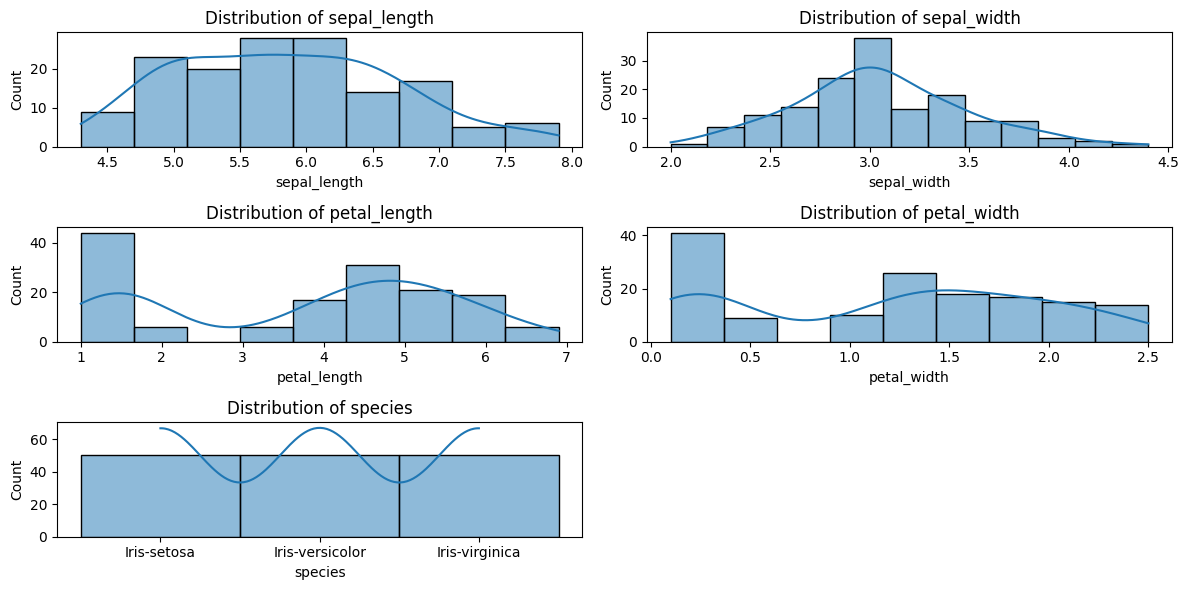

In [5]:
# Plot distributions of variables
X = pd.DataFrame(data)
num_columns = len(X.columns)
num_rows = (num_columns + 1) // 2
num_cols = 2

# Create subplots based on the calculated rows and columns
plt.figure(figsize=(12, 6))
for i, column in enumerate(X.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.histplot(X[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)

plt.tight_layout()
plt.show()

### Split Data and Feature Scaling

In [6]:
X = data.drop('species', axis=1)
y = data['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Train the Model and Evaluate

In [8]:
# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [9]:
# Evaluate the model
y_pred = svm_model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



###  Generate Confusion Matrix

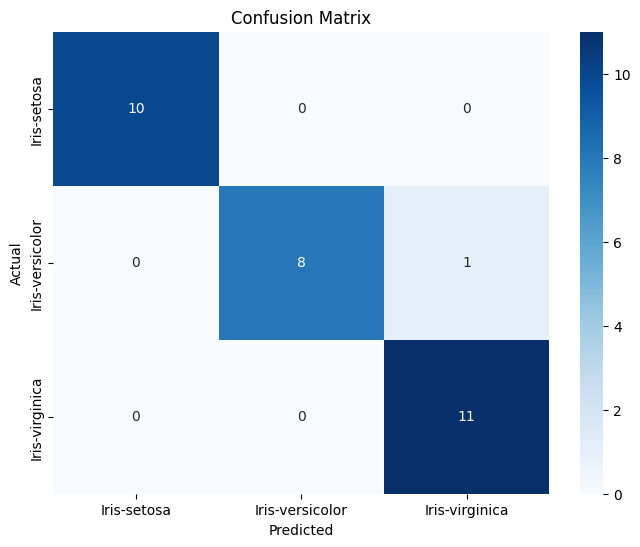

In [10]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()